# Wisconsin Diagnostic Breast Cancer (WDBC)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wdbc.data', header=None);

### Eliminando primeira coluna referende aos ids de cada pasciente (coluna desnecesaria)

In [3]:
df = df.drop(columns=0);

### Analizando os dados

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), object(1)
memory usage: 137.9+ KB


In [6]:
df.describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.corr()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
2,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
4,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [8]:
df.hist(bins=20, figsize=(16,16));

In [9]:
df[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

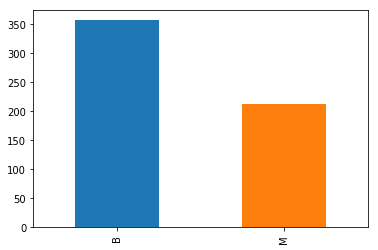

In [10]:
df[1].value_counts().plot(kind='bar');

## Separacao dos dados

In [11]:
df = pd.get_dummies(df,prefix=[0],drop_first=True);

In [12]:
df = df.rename(columns={'0_M':'Label'})

In [13]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y);

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Standartizando

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
s = StandardScaler()

In [19]:
X_train_std = s.fit_transform(X_train);
X_test_std = s.transform(X_test);

### Criando modelos

In [20]:
from sklearn.linear_model import Perceptron

In [21]:
P = Perceptron(penalty=None, alpha=0.0001, max_iter=500, tol=1e-3);
Pl1 = Perceptron(penalty='l1', alpha=0.001, max_iter=500, tol=1e-3);
Pl2 = Perceptron(penalty='l2', alpha=0.00001, max_iter=500, tol=1e-3);

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [23]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [24]:
modelos = {}
modelos['Perceptron_01'] = Perceptron(max_iter = 500 , tol = 1e-3, alpha=0.01)
modelos['Perceptron_01_l1'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l1', alpha=0.01)
modelos['Perceptron_01_l2'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l2', alpha=0.01)
modelos['Perceptron_01_elasticnet'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='elasticnet', alpha=0.01)
modelos['Perceptron_001'] = Perceptron(max_iter = 500 , tol = 1e-3, alpha=0.001)
modelos['Perceptron_001_l1'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l1', alpha=0.001)
modelos['Perceptron_001_l2'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l2', alpha=0.001)
modelos['Perceptron_001_elasticnet'] = Perceptron(max_iter = 1000 , tol = 1e-3, penalty='elasticnet', alpha=0.001)
modelos['Perceptron_0001'] = Perceptron(max_iter = 500 , tol = 1e-3, alpha=0.0001)
modelos['Perceptron_0001_l1'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l1', alpha=0.0001)
modelos['Perceptron_0001_l2'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l2', alpha=0.0001)
modelos['Perceptron_0001_elasticnet'] = Perceptron(max_iter = 500 , tol = 1e-3, penalty='elasticnet', alpha=0.0001)

In [25]:
acc = {}
for k in modelos:
    acc[k] = cross_val_score(modelos[k], X_train_std, y_train, cv=cv, scoring='accuracy')
    print(k + ':\t\t' + str(acc[k]) + '\t->>\t' + str(np.mean(acc[k])))

Perceptron_01:		[0.97368421 0.94736842 0.9602649 ]	->>	0.960439177413733
Perceptron_01_l1:		[0.95394737 0.92763158 0.96688742]	->>	0.9494887881956547
Perceptron_01_l2:		[0.82236842 0.95394737 0.9602649 ]	->>	0.9121935633786453
Perceptron_01_elasticnet:		[0.82236842 0.95394737 0.9602649 ]	->>	0.9121935633786453
Perceptron_001:		[0.97368421 0.94736842 0.9602649 ]	->>	0.960439177413733
Perceptron_001_l1:		[0.95394737 0.95394737 0.96688742]	->>	0.9582607180202162
Perceptron_001_l2:		[0.93421053 0.91447368 0.95364238]	->>	0.9341088648774254
Perceptron_001_elasticnet:		[0.93421053 0.91447368 0.95364238]	->>	0.9341088648774254
Perceptron_0001:		[0.97368421 0.94736842 0.9602649 ]	->>	0.960439177413733
Perceptron_0001_l1:		[0.98684211 0.94736842 0.9602649 ]	->>	0.9648251423260138
Perceptron_0001_l2:		[0.96710526 0.95394737 0.97350993]	->>	0.9648541884512606
Perceptron_0001_elasticnet:		[0.96710526 0.95394737 0.97350993]	->>	0.9648541884512606


#### Melhores modeloes soram os utilizado alpha=0.0001 e as seguintes penalidades, L1, L2 e Elasticnet

In [26]:
model1 = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l1', alpha=0.0001)
model1.fit(X_train_std, y_train)
y_pred1 = model1.predict(X_test_std)
acc1 = accuracy_score(y_test, y_pred1)
acc1

0.9649122807017544

In [27]:
model2 = Perceptron(max_iter = 500 , tol = 1e-3, penalty='l2', alpha=0.0001)
model2.fit(X_train_std, y_train)
y_pred2 = model2.predict(X_test_std)
acc2 = accuracy_score(y_test, y_pred2)
acc2

0.956140350877193

In [28]:
model3 = Perceptron(max_iter = 500 , tol = 1e-3, penalty='elasticnet', alpha=0.0001)
model3.fit(X_train_std, y_train)
y_pred3 = model1.predict(X_test_std)
acc3 = accuracy_score(y_test, y_pred3)
acc3

0.9649122807017544

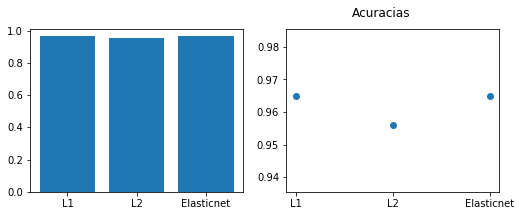

In [56]:
accs = [acc1,acc2,acc3]
plt.figure(1, figsize=(13, 3));
plt.subplot(131);
plt.bar(['L1','L2','Elasticnet'],accs);
plt.subplot(132);
plt.scatter(['L1','L2','Elasticnet'],accs);
plt.suptitle('Acuracias');
plt.show()